# 📈 US Stock Market Analysis
### Author: Aston Crawley

In [12]:
# ============== 1. Setup ==============
# Import libraries
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
# List all CSV files in the data directory
glob.glob(os.path.join("..", "data", "*.csv"))

['../data/XRX_data.csv',
 '../data/GS_data.csv',
 '../data/SPGI_data.csv',
 '../data/MTB_data.csv',
 '../data/V_data.csv',
 '../data/CTAS_data.csv',
 '../data/ESRX_data.csv',
 '../data/APH_data.csv',
 '../data/BBT_data.csv',
 '../data/RHI_data.csv',
 '../data/GGP_data.csv',
 '../data/HCA_data.csv',
 '../data/HD_data.csv',
 '../data/PEP_data.csv',
 '../data/INTC_data.csv',
 '../data/MAC_data.csv',
 '../data/CLX_data.csv',
 '../data/UNP_data.csv',
 '../data/WAT_data.csv',
 '../data/EMN_data.csv',
 '../data/ADSK_data.csv',
 '../data/ALK_data.csv',
 '../data/VZ_data.csv',
 '../data/AFL_data.csv',
 '../data/ADP_data.csv',
 '../data/CSRA_data.csv',
 '../data/AON_data.csv',
 '../data/APC_data.csv',
 '../data/WRK_data.csv',
 '../data/XYL_data.csv',
 '../data/OMC_data.csv',
 '../data/SLB_data.csv',
 '../data/NOV_data.csv',
 '../data/CMA_data.csv',
 '../data/INFO_data.csv',
 '../data/CRM_data.csv',
 '../data/AMGN_data.csv',
 '../data/ED_data.csv',
 '../data/AIZ_data.csv',
 '../data/RSG_data.csv'

In [15]:
# Select the FAAMG stock symbols
stock_tickers = [
    "AAPL",  # Apple Inc.
    "AMZN",  # Amazon.com Inc.
    "GOOGL", # Alphabet Inc. (Google)
    "MSFT"   # Microsoft Corporation
]

In [16]:
# ============== 2. Load Data ==============

df = pd.DataFrame()

for ticker in stock_tickers:
    file_path = os.path.join("..", "data", f"{ticker}_data.csv")
    temp_df = pd.read_csv(file_path)
    
    df = pd.concat([df, temp_df], ignore_index=True)

In [17]:
df.shape

(5036, 7)

In [18]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
df["Name"].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [20]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [23]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [29]:
# Convert "date" column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["date"]

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

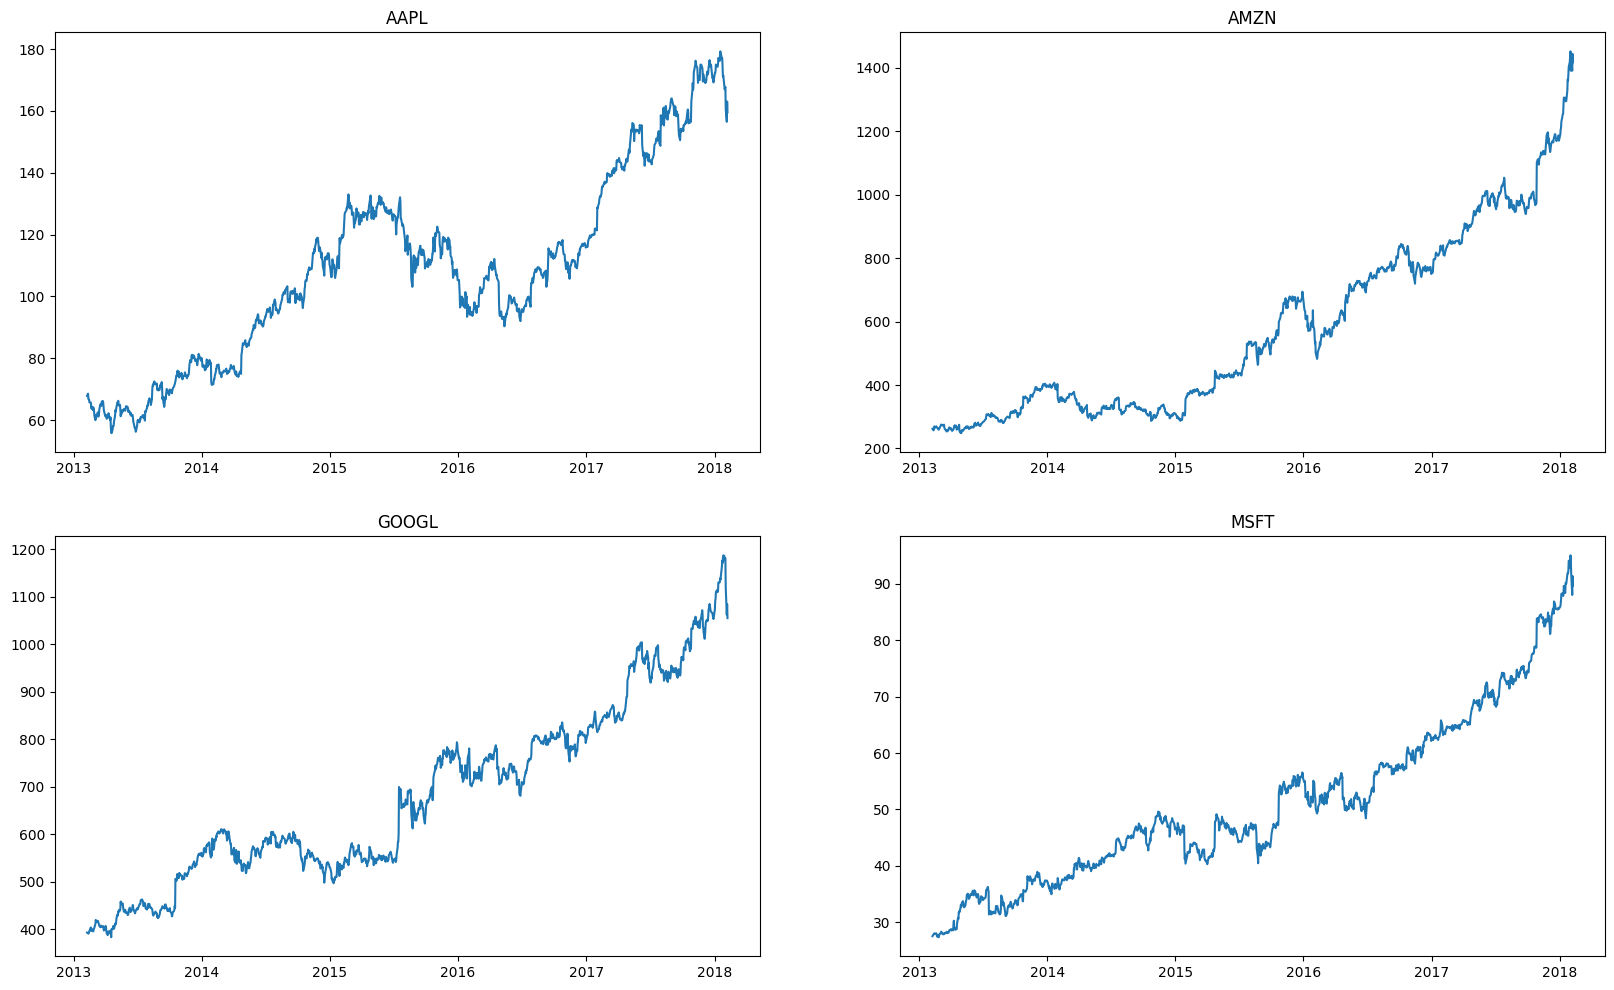

In [40]:
# plt.figure(figsize=(12, 8))
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = df[df["Name"] == stock]
    plt.plot(stock_data["date"], stock_data["close"])
    plt.title(f"{stock}")

In [44]:
df["close"].rolling(window=10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
5031    92.765
5032    92.943
5033    92.582
5034    92.525
5035    92.304
Name: close, Length: 5036, dtype: float64

In [45]:
moving_avg_df = df.copy()

moving_avg_windows = [10, 20, 50]

for window in moving_avg_windows:
    moving_avg_df[f"close_{window}"] = moving_avg_df.groupby("Name")["close"].transform(lambda x: x.rolling(window).mean())

In [46]:
moving_avg_df[moving_avg_df["Name"] == "AAPL"]["close_10"].head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
Name: close_10, dtype: float64

In [47]:
moving_avg_df[moving_avg_df["Name"] == "GOOGL"]["close_10"].head(15)

2518          NaN
2519          NaN
2520          NaN
2521          NaN
2522          NaN
2523          NaN
2524          NaN
2525          NaN
2526          NaN
2527    395.72582
2528    395.99609
2529    396.38198
2530    397.33694
2531    398.25486
2532    399.17428
Name: close_10, dtype: float64

In [ ]:
# moving_avg_df.set_index("date", inplace=True)

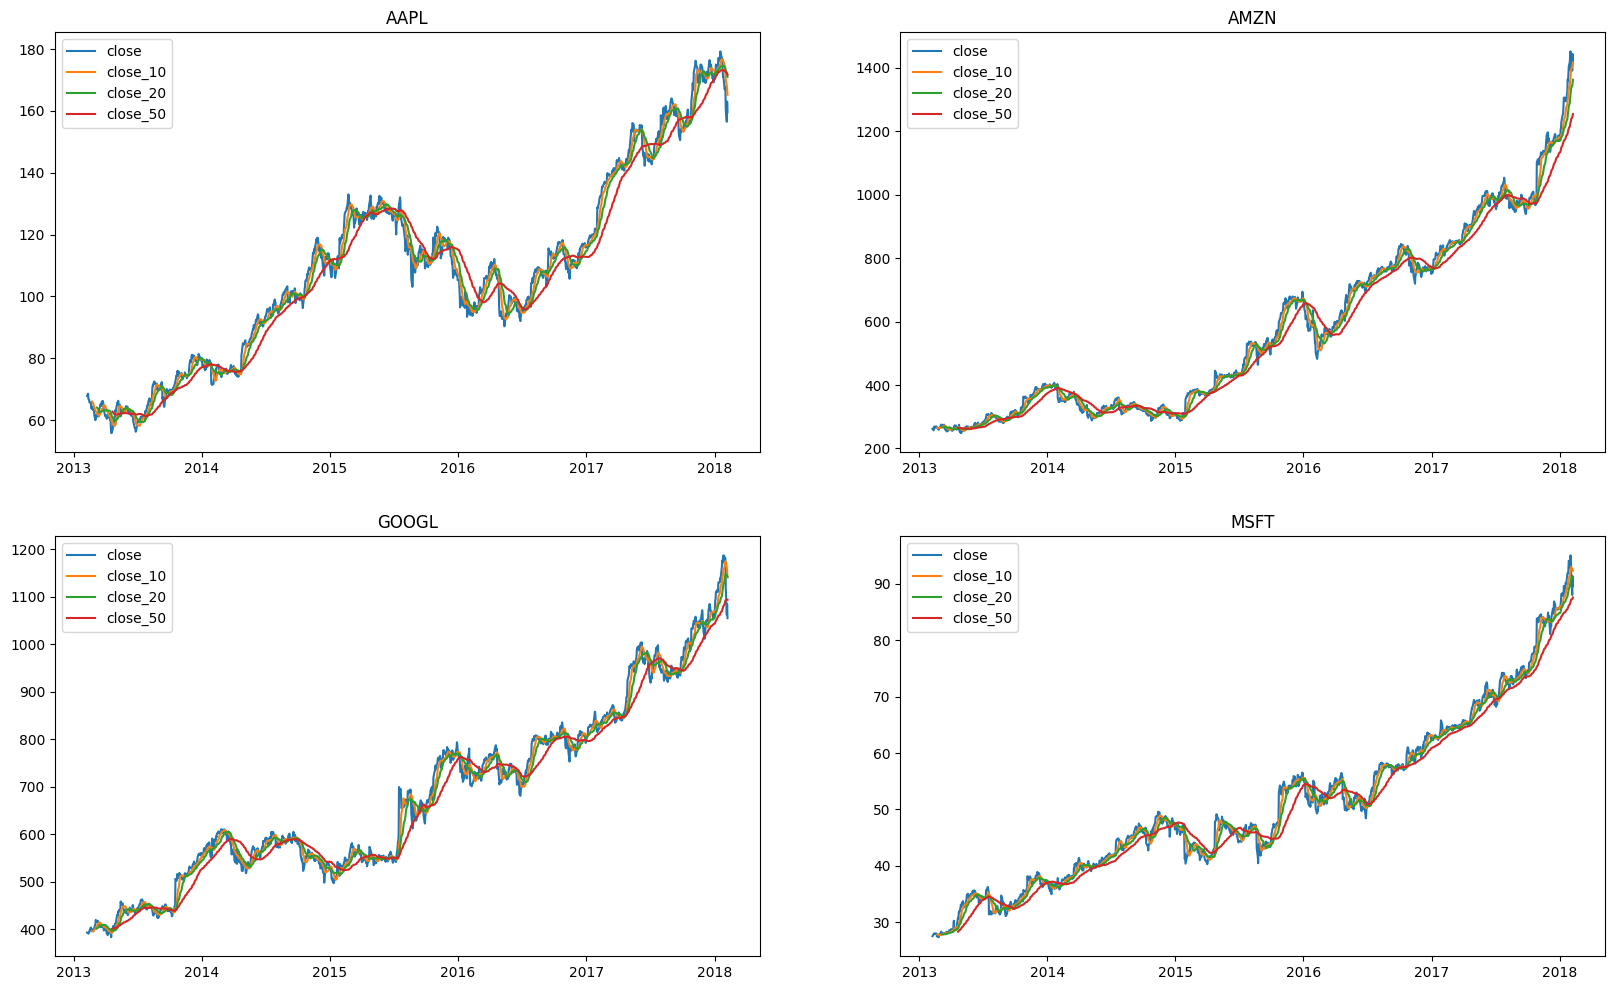

In [51]:
plt.figure(figsize=(20, 12))

for index, stock in enumerate(stock_tickers, 1):
    plt.subplot(2, 2, index)
    stock_data = moving_avg_df[moving_avg_df["Name"] == stock]
    # moving_avg_df[["close_10", "close_20", "close_50"]].plot(ax=plt.gca())
    plt.plot(stock_data["date"], stock_data["close"], label="close")
    plt.plot(stock_data["date"], stock_data["close_10"], label="close_10")
    plt.plot(stock_data["date"], stock_data["close_20"], label="close_20")
    plt.plot(stock_data["date"], stock_data["close_50"], label="close_50")
    plt.legend()
    plt.title(f"{stock}")

In [52]:
apple_df = df[df["Name"] == "AAPL"].copy()

apple_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [53]:
apple_df["change"] = apple_df["close"].pct_change() *100

In [55]:
import plotly.express as px

px.line(apple_df, x="date", y="change", title="Apple Daily Percentage Change", labels={"change": "Daily % Change", "date": "Date"})

In [56]:
apple_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
change           float64
dtype: object

In [ ]:
apple_df.set_index("date", inplace=True)

KeyError: "None of ['date'] are in the columns"

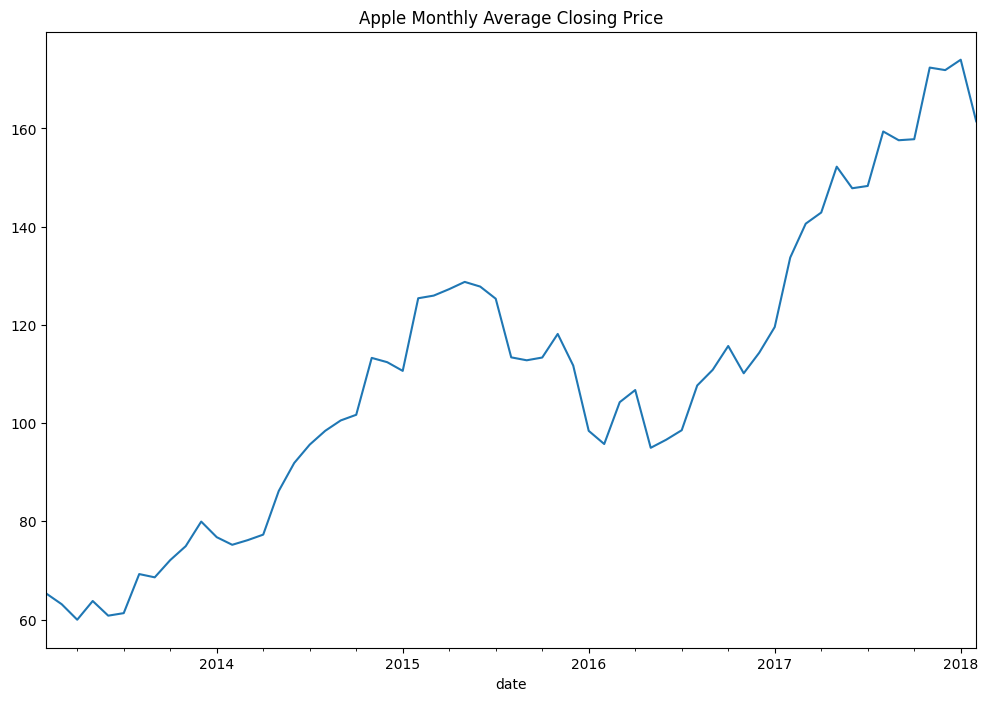

In [61]:
apple_df.resample("M")["close"].mean().plot(title="Apple Monthly Average Closing Price", figsize=(12, 8))
plt.show()

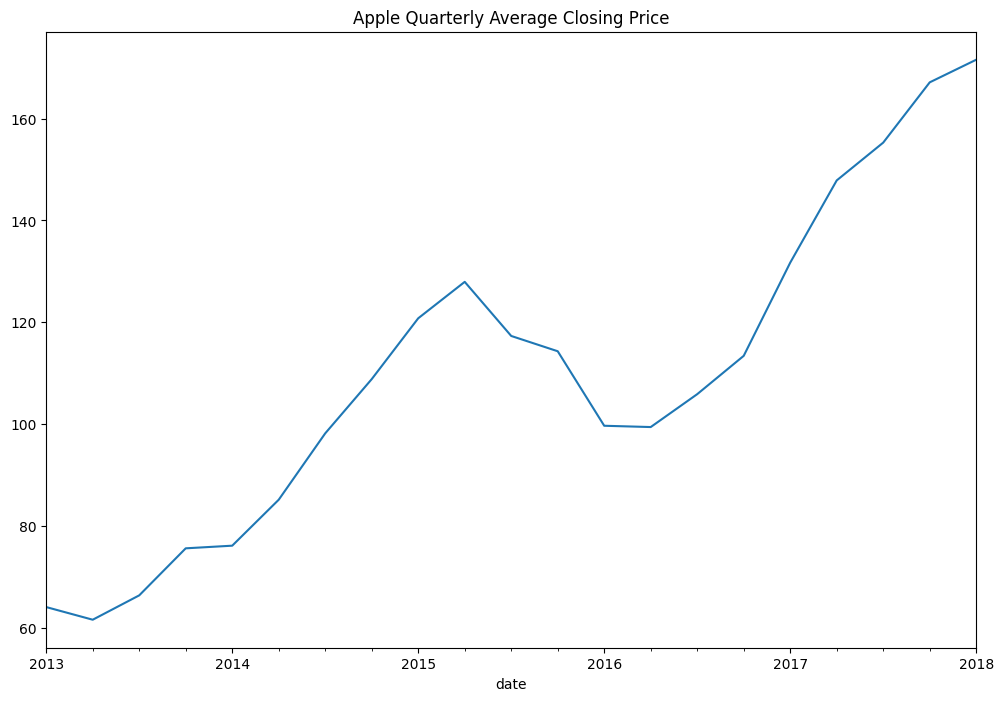

In [64]:
apple_df.resample("Q")["close"].mean().plot(title="Apple Quarterly Average Closing Price", figsize=(12, 8))
plt.show()

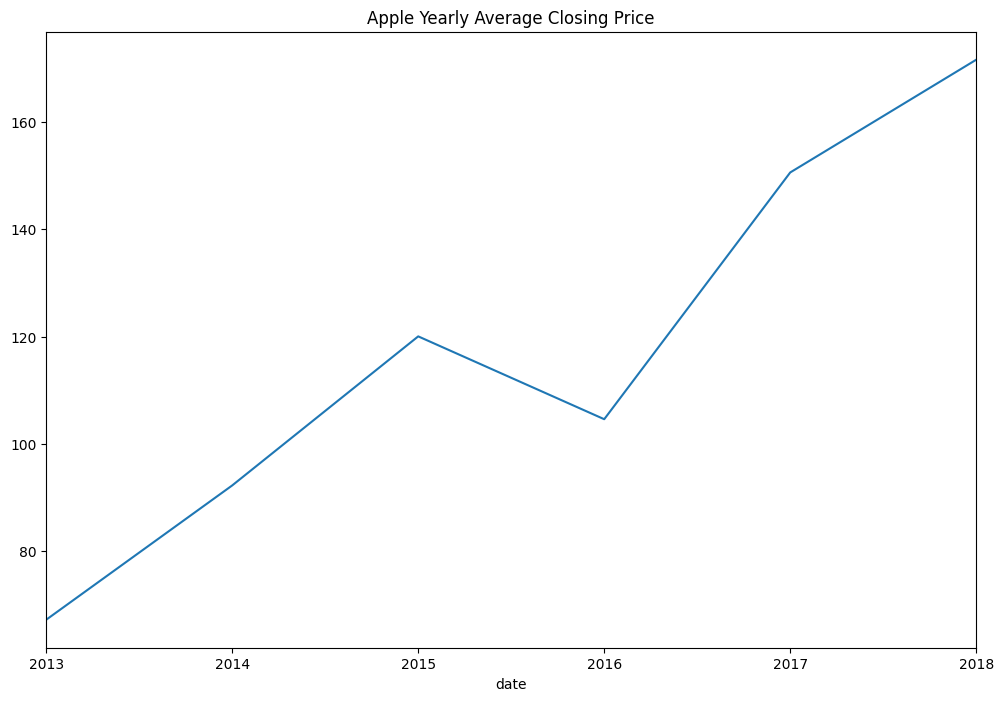

In [65]:
apple_df.resample("Y")["close"].mean().plot(title="Apple Yearly Average Closing Price", figsize=(12, 8))
plt.show()

In [66]:
close_df = pd.DataFrame()

for stock in stock_tickers:
    stock_data = df[df["Name"] == stock][["date", "close"]].copy()
    stock_data.set_index("date", inplace=True)
    close_df[stock] = stock_data["close"]

In [67]:
close_df.head()

,AAPL,AMZN,GOOGL,MSFT
date,,,,
2013-02-08,67.8542,261.95,393.0777,27.55
2013-02-11,68.5614,257.21,391.6012,27.86
2013-02-12,66.8428,258.70,390.7403,27.88
2013-02-13,66.7156,269.47,391.8214,28.03
2013-02-14,66.6556,269.24,394.3039,28.04


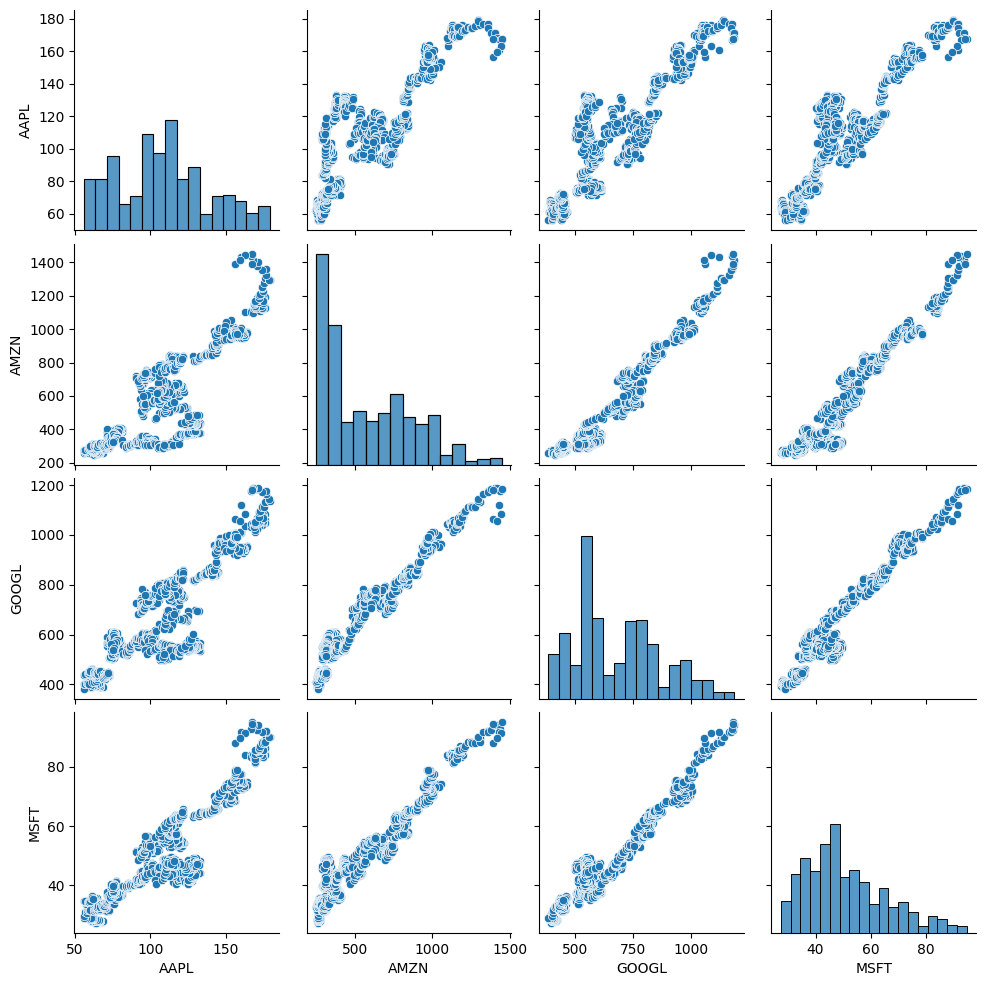

In [69]:
sns.pairplot(close_df)
plt.show()

In [70]:
close_df.corr()

,AAPL,AMZN,GOOGL,MSFT
AAPL,1.000000,0.819078,0.843736,0.899689
AMZN,0.819078,1.000000,0.973988,0.955977
GOOGL,0.843736,0.973988,1.000000,0.970779
MSFT,0.899689,0.955977,0.970779,1.000000


In [ ]:
sns.heatmap(close_df.corr(), annot=True)
plt.show()